## Practice is taken from this: https://darribas.org/gds_course/content/bB/diy_B.html

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
url = ("https://docs.google.com/spreadsheets/d/"\
       "1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/"\
       "export?format=csv&gid=1")
print(url)

https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/export?format=csv&gid=1


In [80]:
df = pd.read_csv(url, skiprows = [0],thousands= "," )
df = df.drop(df.tail(1).index)

df.tail()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
67,2009.0,August,445.0,206,190.0,64.0,77.0
68,2009.0,September,614.0,197,133.0,54.0,70.0
69,2009.0,October,462.0,107,86.0,76.0,74.0
70,2009.0,November,410.0,120,69.0,30.0,32.0
71,2009.0,December,287.0,87,65.0,33.0,35.0


#### Minimum number of casualties and the month

In [81]:
print(df["Civilians"].min())

print(df[df.Civilians == df.Civilians.min()])

2
     Year  Month  Taliban  Civilians  Afghan forces  \
2  2004.0  March     19.0          2            NaN   

   Nato (detailed in spreadsheet)  Nato - official figures  
2                             2.0                      3.0  


#### How many NATO casualties were registered in August 2008?

In [82]:
nato = df[df["Year"] == 2008.0]
nato = df[df["Month"] == "August"]

print(nato)
print()
total_casualties = nato["Nato - official figures"].sum()
print(total_casualties)


      Year   Month  Taliban  Civilians  Afghan forces  \
7   2004.0  August     20.0         26           10.0   
19  2005.0  August     90.0          6           10.0   
31  2006.0  August    161.0        101           42.0   
43  2007.0  August    551.0         65           89.0   
55  2008.0  August    326.0         46           61.0   
67  2009.0  August    445.0        206          190.0   

    Nato (detailed in spreadsheet)  Nato - official figures  
7                              3.0                      4.0  
19                            13.0                     33.0  
31                            18.0                     29.0  
43                            31.0                     34.0  
55                            46.0                     46.0  
67                            64.0                     77.0  

223.0


#### What is the month with the most total number of casualties?

In [83]:
casualties = df.groupby("Month").sum()
total_casualties = casualties.drop(columns = ["Year"])
# print(total_casualties)

max_casualty = total_casualties.sum(axis=1).max()
compiled_casualties = total_casualties.sum(axis=1)

answer = compiled_casualties[compiled_casualties == max_casualty].index

print(answer.tolist())


['September']


#### Can you make a plot of the distribution of casualties over time?

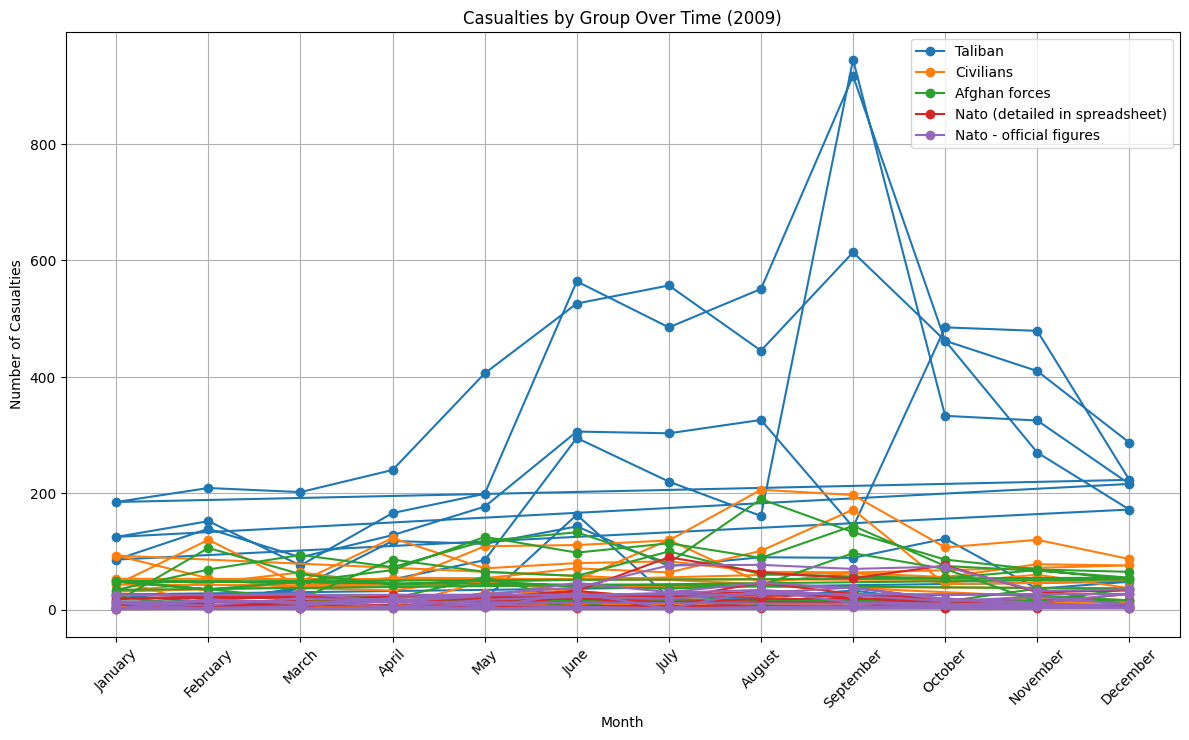

In [90]:
# Set up the plot
plt.figure(figsize=(12, 7))

# Plot each group
groups = ["Taliban", "Civilians", "Afghan forces", 
          "Nato (detailed in spreadsheet)", "Nato - official figures"]

for group in groups:
    plt.plot(df["Month"], df[group], marker='o', label=group)

# Customize the plot
plt.title("Casualties by Group Over Time (2009)")
plt.xlabel("Month")
plt.ylabel("Number of Casualties")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

# Show the plot
plt.show()